#1-Création d'un réseau de neurones

In [1]:
#http://www.oliviergibaru.org/courses/ML_Keras.html

import keras
#keras est le module Python utilisé pour créer le réseau neuronal.

from keras.models import Sequential, Model
#Sequential, Model permet de travailler avec les modèles séquentiels.

from keras.layers import Dense, Dropout, Activation

from tensorflow.keras.optimizers import RMSprop
#RMSprop est l'optimiseur utilisé pour notre réseau neuronal.

from keras.utils import np_utils

from keras.datasets import fashion_mnist
#keras.datasets est un module qui contient quelques bases de données déjà vectorisées en format numpy, pour s'entraîner à coder des réseaux.
#fashion_mnist est la base de données à étudier.
  #C'est une base de données labelisée d'images, en niveau de gris, comportant 10 classes.
  #Elle regroupe 60 000 images d'apprentissage et 10 000 images de test;
  #La taille de chaque image est de 28 × 28 = 784 pixels.

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train) est la base de données d'entraînement du réseau.
#(x_test, y_test) est la base de données de test du réseau.


data=(x_train, y_train)[0] #(x_train, y_train)[0] correspond à la liste des images d'entraînement
target=(x_train, y_train)[1] #(x_train, y_train)[1] correspond à la liste des classes associées aux images d'entraînement.

X_train=x_train.reshape(60000,784)
#La base de données contient 60 000 images de test.
#Les images d'entraînement sont de dimensions 28 x 28 = 784 pixels.
X_test=x_test.reshape(10000,784)
#La base de données contient 10 000 images de test.
#Les images de test sont de dimensions 28 x 28 = 784 pixels.

#Pour que les valeurs appartiennent à [0,1]

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /= 255
X_test /= 255

num_classes=10
#num_classes est le nombre de classes différentes.
#D'après l'énoncé, fashion_mnist contient 10 classes différentes.
nb_classes=num_classes
Y_train = np_utils.to_categorical(y_train,num_classes)
Y_test=np_utils.to_categorical(y_test, num_classes)
#convert class vectors to binary class matrices


model = Sequential(layers=None,name='Model0')
#Indique que le modèle à utiliser est le modèle Sequential().
model.add(Dense(512,input_shape=(784,), activation='relu'))
#512 est le nombre de neurones pour la première couche.
#activation='relu' ordonne d'utiliser la fonction d'activation du redresseur.
#La fonction d'activation du redresseur est de nos jours utilisée car elle a de meilleures performances. cf. https://www.oliviergibaru.org/courses/ML_Keras.html
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#512 est le nombre de neurones de la deuxième couche.
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
#Compile le modèle
#loss : Indique la fonction de perte à utiliser pour évaluer l'ensemble de poids.
#optimizer : Indique l'optimiseur à utiliser lors de l'entraînement du réseau neuronal. (https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5)
#L'optimiseur est utilisé pour rechercher parmi différentes pondérations pour le réseau, et pour toutes les mesures facultatives.

batch_size=10000
#batch_size est le nombre d'échantillons d'entraînement.
epochs = 10
#epochs est le nombre d'itérations d'entraînement de l'algorithme.

model.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))
#Lance l'entraînement du modèle.
#X_train contient les images d'entraînement.
#Y_train contient les classes associées aux images d'entraînement.
#batch_size est le nombre d'échantillons d'entraînement.
#epochs est le nombre d'itérations d'entraînement de l'algorithme.
#verbose définit ce qu'affiche l'algorithme à chaque époque (https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model)
#validation_data est la base de données sur laquelle le réseau se teste.

score = model.evaluate(X_test, Y_test, verbose=0)
#Évalue le modèle.
#verbose définit ce qu'affiche l'algorithme à chaque époque (https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model)
print('Test loss:', score[0])
#Affiche le taux de perte final, ie après entraînement du réseau neuronal.
print('Test accuracy :', score[1])
#Affiche la précision finale obtenue après entraînement du réseau neuronal.
model.summary()
#Affiche un bilan de l'entraînement du réseau neuronal.

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 1.8346 - accuracy: 0.4101 - val_loss: 1.0326 - val_accuracy: 0.6636
Epoch 2/10
6/6 [==============================] - 10s 2s/step - loss: 1.0352 - accuracy: 0.6230 - val_loss: 1.0002 - val_accuracy: 0.6850
Epoch 3/10
6/6 [==============================] - 4s 704ms/step - loss: 0.8147 - accuracy: 0.7131 - val_loss: 0.8996 - val_accuracy: 0.6316
Epoch 4/10
6/6 [==============================] - 4s 707ms/step - loss: 0.7583 - accuracy: 0.7157 - val_loss: 0.7071 - val_accuracy: 0.7257
Epoch 5/10
6/6 [==============================] - 4s 708ms/step - loss: 0.7100 - accuracy: 0.7370 - val_loss: 0.6628 - val_accuracy: 0.7522
Epoch 6/10
6/6 [==============================] - 4s 708ms/step - loss: 0.6805 - accuracy: 0.7531 - val_loss: 0.5693 - val_accuracy: 0.7988
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.6609 - accuracy: 0.7561 - val_

#2-Quantification des performances

In [2]:
import numpy as np

classes_Y=model.predict(X_test,batch_size=10000,verbose=0)
Y_pred=np.argmax(classes_Y,axis=1)

print('Matrice de confusion :')

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,Y_pred))

Matrice de confusion :
[[830   1  10  20  10   2 113   0  14   0]
 [ 10 933  14  30   7   0   4   0   2   0]
 [ 13   0 600   3 284   1  95   0   4   0]
 [ 67   8   6 731 109   0  73   0   6   0]
 [  0   1  56   5 883   0  53   0   2   0]
 [  0   0   0   0   0 952   0  31   2  15]
 [196   2 105  15 160   0 505   0  17   0]
 [  0   0   0   0   0  49   0 918   0  33]
 [  2   1   7   3   6   5  28   5 943   0]
 [  0   0   0   0   0  24   0  61   1 914]]


#3-Corrélation softmax

In [3]:
print(model.predict(X_test,batch_size=10000,verbose=0)[0])

#Probabilités estimées par les neurones d'appartenir à telle ou telle classe.

[0.00100862 0.00052367 0.00166562 0.00097346 0.00126429 0.23969829
 0.00148661 0.24798495 0.00530279 0.5000917 ]


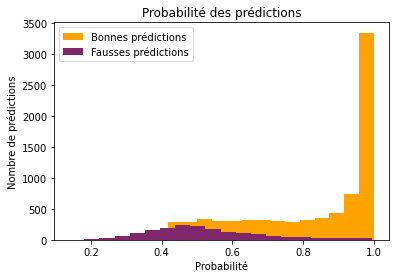

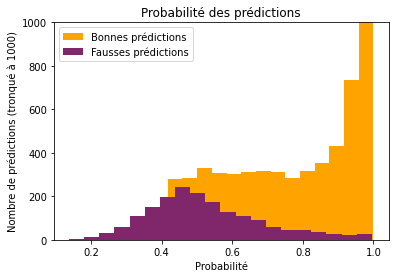

In [4]:
y_pred_m=model.predict(X_test,batch_size=10000,verbose=0)

BP,FP=[],[] #Bonnes prédictions / Fausses prédictions

for k in range(len(Y_pred)):
  if Y_pred[k]==y_test[k]:
    BP.append(max(y_pred_m[k]))
  else:
    FP.append(max(y_pred_m[k]))

import matplotlib.pyplot as plt #Module utilisé pour le tracé des graphes ci-dessous

Violet = (128/255, 39/255, 108/255) #Violet utilisé pour les graphes ci-dessous
Orange = (255/255, 163/255, 0) #Orange utilisé pour les graphes ci-dessous

#Graphique du nombre de prédictions selon leur certitude associée

plt.figure()
plt.title('Probabilité des prédictions') #Titre le graphe
plt.xlabel('Probabilité') #Titre l'axe des abscisses
plt.ylabel('Nombre de prédictions') #Titre l'axe des ordonnées
plt.hist(BP,color=Orange,bins=20,label='Bonnes prédictions') #bins définit le nombre de barres sur l'histogramme
plt.hist(FP,color=Violet,bins=20,label='Fausses prédictions') #Créé l'histogramme des fausses prédictions
plt.legend()
plt.show()

#Même graphique, où le nombre de prédictions est tronqué à 1000, pour plus de visibilité.

plt.figure()
plt.title('Probabilité des prédictions')
plt.ylim(0,1000) #Tronque l'axe des ordonnées à [0,1000]
plt.xlabel('Probabilité')
plt.ylabel('Nombre de prédictions (tronqué à 1000)')
plt.hist(BP,color=Orange,bins=20,label='Bonnes prédictions')
plt.hist(FP,color=Violet,bins=20,label='Fausses prédictions')
plt.legend()
plt.show()

**Application d'un seuil de confiance à 90%, 95% et 99% sur les résultats**

In [5]:
import numpy as np

for indice_conf in [0.90,0.95,0.99]:
  mat_conf=np.zeros((2,2)) #Matrice nulle d'ordre 2
  a,b,c,d=0,0,0,0
  for k in BP:
    if k<indice_conf:
      b+=1 #Bonnes prédictions rejetées à tort
    else:
      a+=1 #Bonnes prédictions gardées
  for k in FP:
    if k<indice_conf:
      d+=1 #Mauvaises prédictions rejetées
    else:
      c+=1 #Mauvaises prédictions gardées à tort
  print('Matrice de confusion pour seuil de confiance à',indice_conf,':')
  print('')
  print(np.array([[a,b],[c,d]]))
  print('')

Matrice de confusion pour seuil de confiance à 0.9 :

[[4273 3936]
 [  54 1737]]

Matrice de confusion pour seuil de confiance à 0.95 :

[[3520 4689]
 [  31 1760]]

Matrice de confusion pour seuil de confiance à 0.99 :

[[2045 6164]
 [   7 1784]]



#4-Méthode ensembliste

**Construction des réseaux neuronaux**

In [6]:
model1=Sequential(layers=None,name='Model1')
model1.add(Dense(512,input_shape=(784,), activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(10,activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model1.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))

model2=Sequential(layers=None,name='Model2')
model2.add(Dense(512,input_shape=(784,), activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model2.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))

model3=Sequential(layers=None,name='Model3')
model3.add(Dense(512,input_shape=(784,), activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10,activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model3.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 5s 739ms/step - loss: 1.8960 - accuracy: 0.3847 - val_loss: 1.0494 - val_accuracy: 0.6374
Epoch 2/10
6/6 [==============================] - 5s 852ms/step - loss: 1.0410 - accuracy: 0.6342 - val_loss: 0.8510 - val_accuracy: 0.6712
Epoch 3/10
6/6 [==============================] - 4s 706ms/step - loss: 0.8059 - accuracy: 0.7174 - val_loss: 0.7416 - val_accuracy: 0.7183
Epoch 4/10
6/6 [==============================] - 5s 923ms/step - loss: 0.7587 - accuracy: 0.7171 - val_loss: 0.7494 - val_accuracy: 0.7314
Epoch 5/10
6/6 [==============================] - 4s 702ms/step - loss: 0.7096 - accuracy: 0.7382 - val_loss: 0.6285 - val_accuracy: 0.7682
Epoch 6/10
6/6 [==============================] - 4s 705ms/step - loss: 0.6597 - accuracy: 0.7578 - val_loss: 0.7782 - val_accuracy: 0.6881
Epoch 7/10
6/6 [==============================] - 4s 705ms/step - loss: 0.6509 - accuracy: 0.7625 - val_loss: 0.6644 - val_accuracy: 0.7566
Epoch 8/10
6/6 [====

**Évaluation des performances**

In [7]:
score=model1.evaluate(X_test,Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy :', score[1])
model1.summary()

score=model2.evaluate(X_test,Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy :', score[1])
model2.summary()

score=model3.evaluate(X_test,Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy :', score[1])
model3.summary()

Test loss: 0.5692623257637024
Test accuracy : 0.7868000268936157
Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________________________________

#5-Analyse des résultats

In [17]:
PC=[] #Prédictions confiantes
PR=[] #Prédictions avec réserve
PER=[] #Prédictions non communes, lors des prédictions avec réserve
I1,I2,I3=[],[],[] #Prédiction de chacun des 3 modèles, lors des indécisions

Y_predm1=model1.predict(X_test,batch_size=10000,verbose=0)
Y_predm2=model2.predict(X_test,batch_size=10000,verbose=0)
Y_predm3=model3.predict(X_test,batch_size=10000,verbose=0)

Y_pred1=np.argmax(Y_predm1,axis=1)
Y_pred2=np.argmax(Y_predm2,axis=1)
Y_pred3=np.argmax(Y_predm3,axis=1)

YC,YR,YI=[],[],[] #Sous-listes de y_test, correspondantes aux positions où les prédictions sont respectivement confiantes, avec réserve, et des indécisions

for k in range(10000):
  if Y_pred1[k]==Y_pred2[k] and Y_pred2[k]==Y_pred3[k]:
    PC.append(Y_pred1[k])
    YC.append(y_test[k])
  elif Y_pred1[k]==Y_pred2[k] and Y_pred2[k]!=Y_pred3[k]:
    PR.append(Y_pred1[k])
    PER.append(Y_pred3[k])
    YR.append(y_test[k])
  elif Y_pred1[k]!=Y_pred2[k] and Y_pred2[k]==Y_pred3[k]:
    PR.append(Y_pred2[k])
    PER.append(Y_pred1[k])
    YR.append(y_test[k])
  elif Y_pred1[k]!=Y_pred2[k] and Y_pred1[k]==Y_pred3[k]:
    PR.append(Y_pred1[k])
    PER.append(Y_pred2[k])
    YR.append(y_test[k])
  elif Y_pred1[k]!=Y_pred2[k] and Y_pred2[k]!=Y_pred3[k] and Y_pred1[k]!=Y_pred3[k]:
    I1.append(Y_pred1[k])
    I2.append(Y_pred2[k])
    I3.append(Y_pred3[k])
    YI.append(y_test[k])

**Matrices de confusion**

In [20]:
import numpy as np

from sklearn.metrics import confusion_matrix

print('Matrice de confusion pour le cas a):')
print('')
print(confusion_matrix(YC,PC))
print('')

print('Matrice de confusion pour le cas b):')
print('')
print(confusion_matrix(YR,PR))
print('')

print('Colonne pour le cas c):')
print('')

#Tracer le graphe de mauvaises prédictions d'une classe / nombre d'apparitions de cette classe dans le y_test d'origine 

IndécisionColonne=[[0] for k in range(10)]

for k in range(len(YI)):
  c=0
  while c!=YI[k]:
    c+=1
  IndécisionColonne[c][0]+=1

print(np.array(IndécisionColonne)) #np.array permet d'afficher IndécisionColonne sous forme de matrice de dimensions 10x1.
print('')

#Matrice de confusion globale

MI=confusion_matrix(YC,PC)+confusion_matrix(YR,PR) #Matrice intermédiaire
M=[]
for k in range(10):
  L=list(MI[k])
  L.append(IndécisionColonne[k][0])
  M.append(L)
M.append([IndécisionColonne[k][0] for k in range(10)]+[0])
print(MI)
print('')
print('Matrice de confusion globale')
print('')
print(np.array(M))

Matrice de confusion pour le cas a):

[[470   2   0  27   5   0 107   0  18   0]
 [  0 920   0  18   5   0   1   0   2   0]
 [  2   1  87   3 225   0  62   0  13   0]
 [  2   6   0 691  37   0  22   0   4   0]
 [  0   1   1   3 757   0  12   0   3   0]
 [  0   0   0   0   0 390   0   6   1  10]
 [ 25   2   5  15 103   0 334   0  27   0]
 [  0   0   0   0   0   0   0 671   0  16]
 [  0   1   0   2   3   0   9   2 954   0]
 [  0   0   0   0   0   0   0  10   1 850]]

Matrice de confusion pour le cas b):

[[242   2   4  11   8   1  71   0   5   0]
 [  1  31   1   9   5   0   3   0   0   0]
 [  4   1 236   2 273   1  76   0   2   0]
 [ 20   9   0  83  79   1  26   0   3   0]
 [  0   0  11  10 176   0  17   0   3   0]
 [  0   1   0   0   0 509   0  57   4  11]
 [ 70   2  30   8 192   0 152   0  10   0]
 [  0   0   0   0   0  14   0 240   0  50]
 [  0   0   0   1   2   0   4   2  16   0]
 [  0   0   0   0   0  10   0  37   0  89]]

Colonne pour le cas c):

[[27]
 [ 4]
 [12]
 [17]
 [ 6]
 [11]

#6-Méthode ensembliste avec 4 réseaux

**Quatrième réseau neuronal**

In [21]:
model4=Sequential(layers=None,name='Model1')
model4.add(Dense(512,input_shape=(784,), activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(10,activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model4.fit(X_train,Y_train,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/10
6/6 [==============================] - 5s 741ms/step - loss: 1.7291 - accuracy: 0.4294 - val_loss: 1.0361 - val_accuracy: 0.6019
Epoch 2/10
6/6 [==============================] - 4s 708ms/step - loss: 1.0548 - accuracy: 0.6115 - val_loss: 0.8496 - val_accuracy: 0.6988
Epoch 3/10
6/6 [==============================] - 5s 795ms/step - loss: 0.8297 - accuracy: 0.7032 - val_loss: 0.6764 - val_accuracy: 0.7617
Epoch 4/10
6/6 [==============================] - 4s 710ms/step - loss: 0.7119 - accuracy: 0.7436 - val_loss: 0.7409 - val_accuracy: 0.7313
Epoch 5/10
6/6 [==============================] - 4s 731ms/step - loss: 0.6998 - accuracy: 0.7437 - val_loss: 0.6605 - val_accuracy: 0.7486
Epoch 6/10
6/6 [==============================] - 4s 723ms/step - loss: 0.6622 - accuracy: 0.7491 - val_loss: 0.8236 - val_accuracy: 0.7069
Epoch 7/10
6/6 [==============================] - 4s 709ms/step - loss: 0.6538 - accuracy: 0.7631 - val_loss: 0.6549 - val_accuracy: 0.7495
Epoch 8/10
6/6 [====

**Classification des prédictions**

In [22]:
PC4=[] #Prédictions confiantes #4 pour 4 réseaux neuronaux utilisés
PR43=[] #Prédictions communes à 3 réseaux parmi les prédictions avec réserve
PR42=[] #Prédictions communes à 2 réseaux parmi les prédictions avec réserve
PER41=[] #Prédictions non communes 1, lors des prédictions avec réserve, communes à 2 réseaux (ordre croissant des numéros des réseaux)
PER42=[] #Prédictions non communes 2, "
PER43=[] #Prédictions mises en réserves, lors des prédictions avec réserve, communes à 3 réseaux
I1,I2,I3,I4=[],[],[],[] #Prédiction de chacun des 3 modèles, lors des indécisions

Y_predm1=model1.predict(X_test,batch_size=10000,verbose=0)
Y_predm2=model2.predict(X_test,batch_size=10000,verbose=0)
Y_predm3=model3.predict(X_test,batch_size=10000,verbose=0)
Y_predm4=model4.predict(X_test,batch_size=10000,verbose=0)

Y_pred1=np.argmax(Y_predm1,axis=1)
Y_pred2=np.argmax(Y_predm2,axis=1)
Y_pred3=np.argmax(Y_predm3,axis=1)
Y_pred4=np.argmax(Y_predm4,axis=1)

YC4=[] #Sous-liste de y_test, dont les rangs sont ceux des prédictions confiantes
YI4=[] #" indécisions
YR2=[] #Sous-liste de y_test, dont les rangs sont ceux des prédictions avec réserves, avec 2 réseaux en commun
YR3=[] #" avec 3 réseaux en commun

for k in range(10000):
  if Y_pred1[k]==Y_pred2[k]:
    if Y_pred1[k]==Y_pred3[k]:
      if Y_pred1[k]==Y_pred4[k]:
        PC4.append(Y_pred1[k])
        YC4.append(y_test[k])
        #Prédiction commune aux 4 réseaux, donc confiante.
      else: #Y_pred1 différent de Y_pred4
        PR43.append(Y_pred1[k])
        PER43.append(Y_pred4[k])
        YR3.append(y_test[k])
        #Y_pred1=Y_pred2=Y_pred3 différent de Y_pred4 : Prédiction commune à 3 réseaux (1,2 et 3)
    else: #Y_pred1 différent de Y_pred3
      if Y_pred1[k]==Y_pred4[k]:
        PR43.append(Y_pred1[k])
        PER43.append(Y_pred3[k])
        YR3.append(y_test[k])
        #Y_pred1=Y_pred2=Y_pred4 différent de Y_pred3 : Prédiction commune à 3 réseaux (1,2 et 4)
      else: #Y_pred1 différent de Y_pred4
        if Y_pred3[k]==Y_pred4[k]:
          I1.append(Y_pred1[k])
          I2.append(Y_pred2[k])
          I3.append(Y_pred3[k])
          I4.append(Y_pred4[k])
          YI4.append(y_test[k])
          #Y_pred1=Y_pred2 différent de Y_pred3=Y_pred4 : Indécision, car il y a deux prédictions différentes de même poids
        else: #Y_pred3 différent de Y_pred4
          PR42.append(Y_pred1[k])
          PER41.append(Y_pred3[k])
          PER42.append(Y_pred4[k])
          YR2.append(y_test[k])
          #Y_pred1=Y_pred2 différent de Y_pred3 différent de Y_pred4 : Prédiction commune à 2 réseaux (1,2), sans indécision
  else: #Y_pred1 est différent de Y_pred2
    if Y_pred1[k]==Y_pred3[k]:
      if Y_pred1[k]==Y_pred4[k]:
        PR43.append(Y_pred1[k])
        PER43.append(Y_pred2[k])
        YR3.append(y_test[k])
        #Y_pred1=Y_pred3=Y_pred4 différent de Y_pred2 : Prédiction commune à 3 réseaux (1,3 et 4)
      else: #Y_pred1 est différent de Y_pred4
        if Y_pred2[k]==Y_pred4[k]:
          I1.append(Y_pred1[k])
          I2.append(Y_pred2[k])
          I3.append(Y_pred3[k])
          I4.append(Y_pred4[k])
          YI4.append(y_test[k])
          #Y_pred1=Y_pred3 différent de Y_pred2=Y_pred4 : Indécision, car il y a deux prédictions communes différentes de même poids
        else: #Y_pred2 est différent de Y_pred4
          PR42.append(Y_pred1[k])
          PER41.append(Y_pred2[k])
          PER42.append(Y_pred4[k])
          YR2.append(y_test[k])
          #Y_pred1=Y_pred3 différent de Y_pred2 différent de Y_pred4 : Prédiction commune à 2 réseaux (1,3), sans indécision
    else: #Y_pred1 est différent de Y_pred3
      if Y_pred1[k]==Y_pred4[k]:
        if Y_pred2[k]==Y_pred3[k]:
          I1.append(Y_pred1[k])
          I2.append(Y_pred2[k])
          I3.append(Y_pred3[k])
          I4.append(Y_pred4[k])
          YI4.append(y_test[k])
          #Y_pred1=Y_pred4 différent de Y_pred2=Y_pred3 : Indécision, car il y a deux prédictions communes différentes de même poids
        else: #Y_pred2 est différent de Y_pred3
          PR42.append(Y_pred1[k])
          PER41.append(Y_pred2[k])
          PER42.append(Y_pred3[k])
          YR2.append(y_test[k])
          #Y_pred1=Y_pred4 différent de Y_pred2 différent de Y_pred3 : Prédiction commune à 2 réseaux (1,4), sans indécision
      else: #Y_pred1 est différent de Y_pred4
        if Y_pred2[k]==Y_pred3[k]:
          if Y_pred2[k]==Y_pred4[k]:
            PR43.append(Y_pred2[k])
            PER43.append(Y_pred1[k])
            YR3.append(y_test[k])
            #Y_pred2=Y_pred3=Y_pred4 différent de Y_pred1 : Prédiction commune à 3 réseaux (2,3 et 4)
          else: #Y_pred2 différent de Y_pred4
            PR42.append(Y_pred2[k])
            PER41.append(Y_pred1[k])
            PER42.append(Y_pred4[k])
            YR2.append(y_test[k])
            #Y_pred2=Y_pred3 différent de Y_pred1 différent de Y_pred4 : Prédiction commune à 2 réseaux (2 et 3), sans indécision
        else: #Y_pred2 différent de Y_pred3
          if Y_pred2[k]==Y_pred4[k]:
            PR42.append(Y_pred2[k])
            PER41.append(Y_pred1[k])
            PER42.append(Y_pred3[k])
            YR2.append(y_test[k])
            #Y_pred1 différent de Y_pred2=Y_pred4 différent de Y_pred3 : Prédiction commune à 2 réseaux (2 et 4), sans indécision
          else: #Y_pred2 différent de Y_pred4
            if Y_pred3[k]==Y_pred4[k]:
              PR42.append(Y_pred3[k])
              PER41.append(Y_pred1[k])
              PER42.append(Y_pred2[k])
              YR2.append(y_test[k])
              #Y_pred1 différent de Y_pred2 différent de Y_pred3=Y_pred4 : Prédiction commune à 2 réseaux (3 et 4), sans indécision
            else: #Y_pred3 différent de Y_pred4
              I1.append(Y_pred1[k])
              I2.append(Y_pred2[k])
              I3.append(Y_pred3[k])
              I4.append(Y_pred4[k])
              YI4.append(y_test[k])
              #Tous les réseaux ont des prédictions différentes : Indécision

**Matrices de confusion**

In [23]:
from sklearn.metrics import confusion_matrix

#Cas a) Prédictions confiantes

print('Matrice de confusion pour le cas a):')
print('')
print(confusion_matrix(YC4,PC4))
print('')

#Cas b) Prédictions avec réserve, communes à 3 réseaux

print('Matrice de confusion pour le cas b):')
print('')
print(confusion_matrix(YR3,PR43))
print('')

#Cas c) Prédictions avec réserve, communes à 2 réseaux

print('Matrice de confusion pour le cas c):')
print('')

MR420=confusion_matrix(YR2,PR42)

MR421=np.zeros((10,10),dtype=int)
for i in range(len(MR420[0])):
  for j in range(len(MR420[0])):
    MR421[i][j]=MR420[i][j]

if len(MR420[0])!=10:
  print(MR421)
  print('')
else:
  print(MR420)
  print('')

#Cas d) : Indécisions

print('Colonne pour le cas d):')
print('')

IndécisionColonne=[[0] for k in range(10)]

for k in range(len(YI4)):
  c=0
  while c!=YI4[k]:
    c+=1
  IndécisionColonne[c][0]+=1

print(np.array(IndécisionColonne)) #np.array permet d'afficher IndécisionColonne sous forme de matrice de dimensions 10x1.
print('')

#Matrice de confusion globale

MI4=confusion_matrix(YC4,PC4)+confusion_matrix(YR3,PR43)+MR421 #Matrice intermédiaire
M4=[]
for k in range(10):
  L=list(MI4[k])
  L.append(IndécisionColonne[k][0])
  M4.append(L)
M4.append([IndécisionColonne[k][0] for k in range(10)]+[0])

print('Matrice de confusion globale')
print('')
print(np.array(M4))

Matrice de confusion pour le cas a):

[[465   2   0  27   4   0 107   0  17   0]
 [  0 920   0  18   5   0   1   0   2   0]
 [  2   1  87   3 224   0  57   0  11   0]
 [  2   5   0 691  36   0  22   0   3   0]
 [  0   1   1   3 755   0  11   0   3   0]
 [  0   0   0   0   0 390   0   6   1  10]
 [ 25   2   5  15 103   0 334   0  23   0]
 [  0   0   0   0   0   0   0 671   0  16]
 [  0   1   0   2   2   0   8   2 949   0]
 [  0   0   0   0   0   0   0  10   1 850]]

Matrice de confusion pour le cas b):

[[113   1   4  10   6   1  65   0   3   0]
 [  0  31   1   8   4   0   0   0   0   0]
 [  0   0 236   1 159   1  44   0   2   0]
 [  4   8   0  81  57   1  22   0   2   0]
 [  0   0  11  10 149   0  12   0   2   0]
 [  0   1   0   0   0 489   0  37   2  11]
 [ 17   1  30   7 117   0 134   0   6   0]
 [  0   0   0   0   0  13   0 220   0  39]
 [  0   0   0   1   2   0   2   1  16   0]
 [  0   0   0   0   0   4   0  32   0  87]]

Matrice de confusion pour le cas c):

[[24  0  0  3  1  0 15